In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nisal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nisal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv("processed data\sl_cleaned_txt.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19936 entries, 0 to 19935
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19936 non-null  object 
 1   post_title   19935 non-null  object 
 2   type         19936 non-null  object 
 3   body         15818 non-null  object 
 4   score        19936 non-null  int64  
 5   url          19936 non-null  object 
 6   created_utc  19936 non-null  float64
 7   full_text    19936 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [5]:
df.isna().sum()

id                0
post_title        1
type              0
body           4118
score             0
url               0
created_utc       0
full_text         0
dtype: int64

In [6]:
df["title_len"] = df["post_title"].fillna("").apply(lambda x: len(x.split()))
df["body_len"]  = df["body"].fillna("").apply(lambda x: len(x.split()))
df["text_len"]  = df["full_text"].fillna("").apply(lambda x: len(x.split()))

## Text Length Analysis (Title + Body)

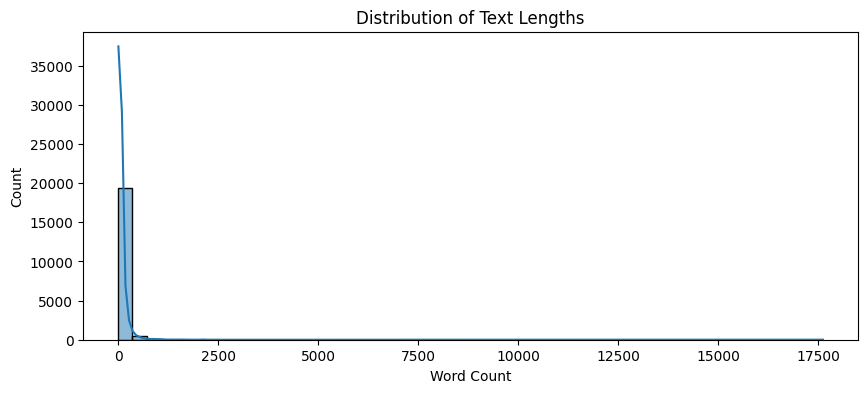

In [7]:
plt.figure(figsize=(10,4))
sns.histplot(df["text_len"], bins=50, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Word Count")
plt.show()

In [8]:
df[["title_len", "body_len", "text_len"]].describe()


,title_len,body_len,text_len
count,19936.000000,19936.000000,19936.000000
mean,10.377006,73.594703,83.971709
std,6.763059,197.159042,197.391202
min,0.000000,0.000000,0.000000
25%,6.000000,8.000000,21.000000
50%,9.000000,37.000000,47.000000
75%,12.000000,84.000000,93.000000
max,65.000000,17611.000000,17626.000000


## Distribution of Scores

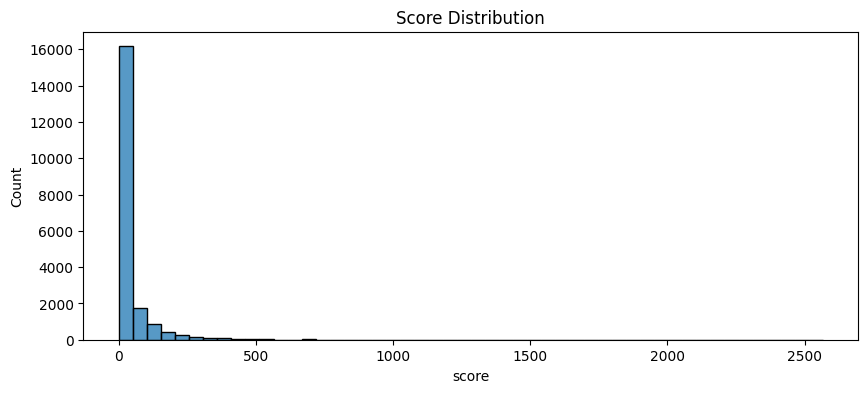

In [9]:
plt.figure(figsize=(10,4))
sns.histplot(df["score"], bins=50, kde=False)
plt.title("Score Distribution")
plt.show()

## Post Type Distribution

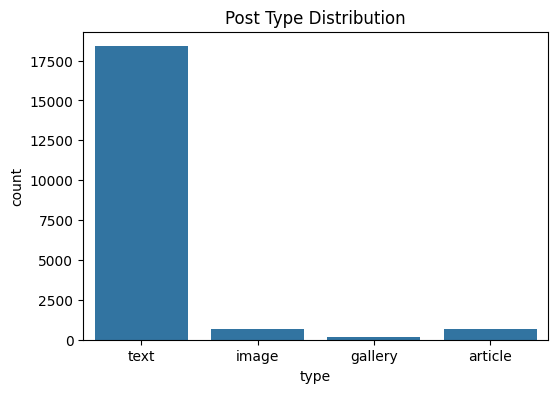

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type")
plt.title("Post Type Distribution")
plt.show()

In [11]:
df["created_dt"] = pd.to_datetime(df["created_utc"], unit="s")
df["year"] = df["created_dt"].dt.year
df["month"] = df["created_dt"].dt.to_period("M")

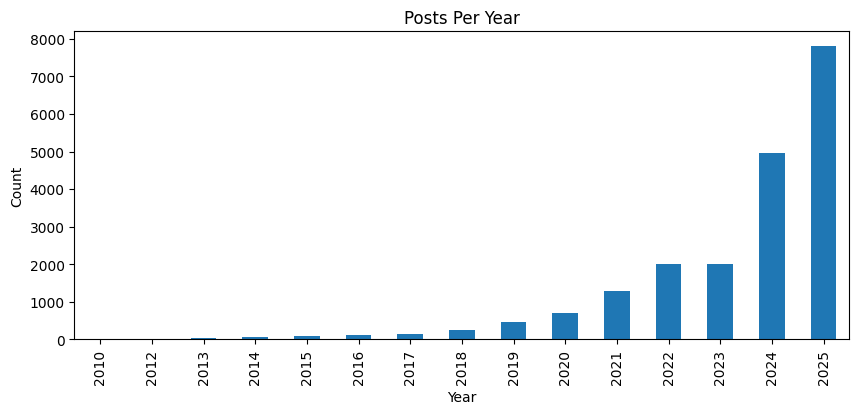

In [12]:
plt.figure(figsize=(10,4))
df["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Posts Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

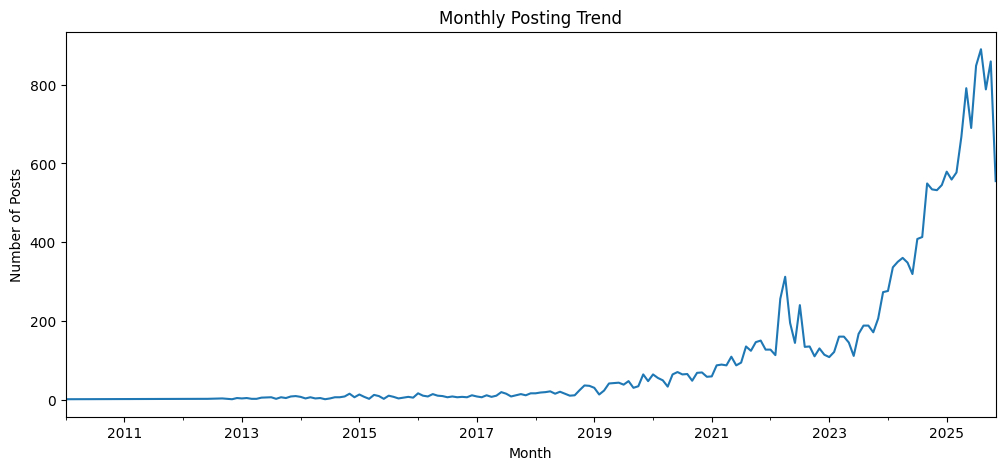

In [13]:
plt.figure(figsize=(12,5))
df["month"].value_counts().sort_index().plot()
plt.title("Monthly Posting Trend")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.show()

In [14]:
stop_words = set(stopwords.words('english'))

def clean_tokens(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

df["tokens"] = df["full_text"].fillna("").apply(clean_tokens)


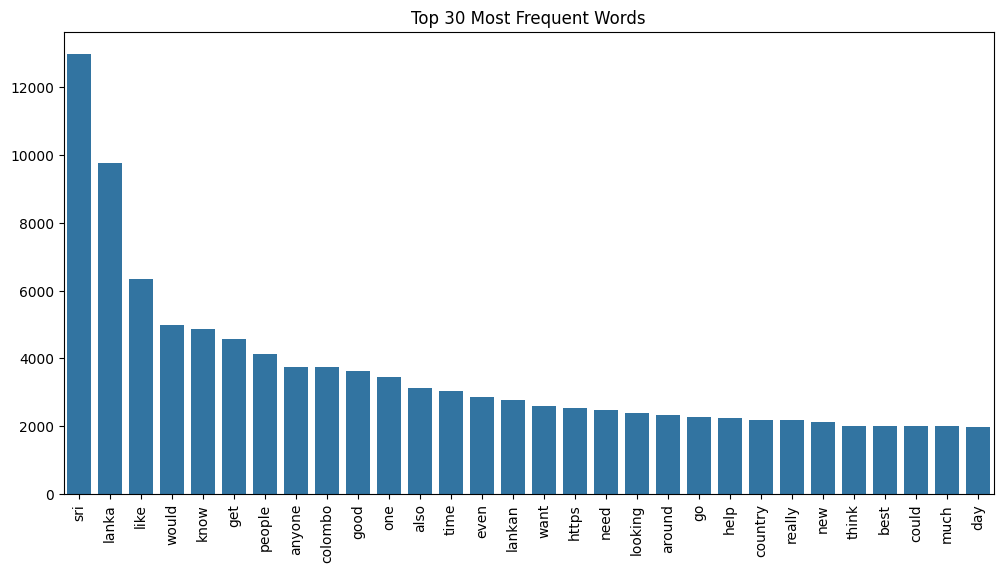

In [15]:
all_words = [word for tokens in df["tokens"] for word in tokens]
word_freq = Counter(all_words).most_common(30)

words, counts = zip(*word_freq)

plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=90)
plt.title("Top 30 Most Frequent Words")
plt.show()


## Bigram & Trigram Frequency

In [16]:
from nltk.util import ngrams

def get_ngrams(tokens_list, n=2):
    ngram_list = []
    for tokens in tokens_list:
        ngram_list.extend(list(ngrams(tokens, n)))
    return Counter(ngram_list).most_common(20)


In [17]:
bigram_freq = get_ngrams(df["tokens"], n=2)
bigram_freq[:10]

[(('sri', 'lanka'), 9466),
 (('sri', 'lankan'), 2646),
 (('https', 'https'), 737),
 (('anyone', 'know'), 705),
 (('thanks', 'advance'), 634),
 (('sri', 'lankans'), 619),
 (('would', 'like'), 535),
 (('new', 'reddit'), 485),
 (('create', 'account'), 482),
 (('account', 'connect'), 480)]

In [18]:
trigram_freq = get_ngrams(df["tokens"], n=3)
trigram_freq[:10]


[(('create', 'account', 'connect'), 480),
 (('account', 'connect', 'world'), 480),
 (('connect', 'world', 'communities'), 480),
 (('world', 'communities', 'new'), 480),
 (('communities', 'new', 'reddit'), 480),
 (('new', 'reddit', 'continuing'), 480),
 (('reddit', 'continuing', 'agree'), 480),
 (('continuing', 'agree', 'acknowledge'), 480),
 (('agree', 'acknowledge', 'understand'), 480),
 (('https', 'https', 'https'), 238)]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19936 entries, 0 to 19935
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           19936 non-null  object        
 1   post_title   19935 non-null  object        
 2   type         19936 non-null  object        
 3   body         15818 non-null  object        
 4   score        19936 non-null  int64         
 5   url          19936 non-null  object        
 6   created_utc  19936 non-null  float64       
 7   full_text    19936 non-null  object        
 8   title_len    19936 non-null  int64         
 9   body_len     19936 non-null  int64         
 10  text_len     19936 non-null  int64         
 11  created_dt   19936 non-null  datetime64[ns]
 12  year         19936 non-null  int32         
 13  month        19936 non-null  period[M]     
 14  tokens       19936 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4),

In [20]:
df.to_csv("processed data\sl_analyzed_txt.csv", index=False)